In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean, pdist, squareform

SEED = 10

In [2]:
final_path = "./dataset/Kaggle/df_final_with_additional_info.csv"

In [3]:
df_final = pd.read_csv(final_path)

In [4]:
df_final

,day,day_number,month,daytime,hour,title,duration,duration_with_advertising,channel,year,genres,rating,advertising,duration_mean,duration_with_advertising_mean,number_movies,sharing
0,Martedì,25,gennaio,notte,01:10,match point,124,125,Sky Cinema Due,2005,"Romance,Thriller,Drama",7.6,1,117.508197,125.819672,61,0.140
1,Lunedì,24,gennaio,notte,01:10,the blind side,129,130,Sky Cinema Due,2009,Drama,7.6,1,117.508197,125.819672,61,0.140
2,Sabato,29,gennaio,notte,04:10,il profeta,100,155,Sky Cinema Due,1968,Comedy,6.1,55,117.508197,125.819672,61,0.140
3,Venerdì,7,gennaio,notte,01:45,blow,124,125,Sky Cinema Due,2001,"Crime,Drama",7.6,1,117.508197,125.819672,61,0.140
4,Sabato,22,gennaio,notte,01:25,blow,124,125,Sky Cinema Due,2001,"Crime,Drama",7.6,1,117.508197,125.819672,61,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,Martedì,24,maggio,sera,23:00,spogliando valeria,92,110,Cielo,1989,"Romance,Thriller",4.5,18,87.166667,105.416667,12,0.905
5714,Sabato,21,maggio,sera,21:20,la nipote,92,105,Cielo,1974,Comedy,4.8,13,87.166667,105.416667,12,0.905
5715,Mercoledì,25,maggio,sera,23:05,la nipote,92,110,Cielo,1974,Comedy,4.8,18,87.166667,105.416667,12,0.905
5716,Sabato,28,maggio,sera,21:20,l'attenzione,87,110,Cielo,1985,"Romance,Drama",4.1,23,87.166667,105.416667,12,0.905


In [5]:
df = df_final[['day', 'day_number', 'month', 'daytime', 'title', 'duration', 'duration_with_advertising', 'year', 'genres', 'rating', 'advertising']]

In [6]:
df_categorical = df_final[['day', 'month', 'daytime', 'title', 'genres']]

In [7]:
df_numerical = df_final[['day_number', 'duration', 'duration_with_advertising', 'year', 'rating', 'advertising']]

In [8]:
scaler = StandardScaler()
numerical_normalized = scaler.fit_transform(df_numerical.values)
df_numerical_normlized = pd.DataFrame(numerical_normalized, columns=df_numerical.columns)

In [9]:
df_numerical_normlized

,day_number,duration,duration_with_advertising,year,rating,advertising
0,1.065787,0.920020,0.187163,0.887340,1.193771,-0.862291
1,0.952580,1.179555,0.415205,1.129169,1.193771,-0.862291
2,1.518616,-0.325749,1.555414,-1.349577,-0.150773,2.556316
3,-0.971942,0.920020,0.187163,0.645511,1.193771,-0.862291
4,0.726165,0.920020,0.187163,0.645511,1.193771,-0.862291
...,...,...,...,...,...,...
5713,0.952580,-0.741005,-0.496962,-0.079975,-1.584954,0.213937
5714,0.612958,-0.741005,-0.725004,-0.986834,-1.316045,-0.102601
5715,1.065787,-0.741005,-0.496962,-0.986834,-1.316045,0.213937
5716,1.405408,-1.000540,-0.496962,-0.321804,-1.943500,0.530475


In [10]:
shape = df_final.shape[0]
shape

5718

In [11]:
def compute_dissimilarity(pd_matrix: pd.DataFrame, metric):
    distances = pdist(pd_matrix, metric)

    # Convert the 'distances' array into a nxm matrix 
    return squareform(distances)

In [12]:
def customized_jaccard_distance(s1: np.ndarray, s2: np.ndarray):
    """
    It is used 's1[0]' because in input we have a NumPy array,
    so we are retrieving the string inside it.

    Since the genres are separated by commas ',' we are 
    using 'split' to get a list with the genres strings.
    """
    union = set(s1[0].split(",")).union(set(s2[0].split(",")))
    intersection = set(s1[0].split(",")).intersection(set(s2[0].split(",")))

    return 1 - len(intersection) / len(union)

In [13]:
def daytime_distance(s1: np.ndarray, s2: np.ndarray):
    """
    It is used 's1[0]' because in input we have a NumPy array,
    so we are retrieving the string inside it.
    """
    daytime_map = {"mattina": 0, "pomeriggio": 1, "sera": 2, "notte": 3}

    # Map strings to integers and take the absolute value of the difference
    return abs(daytime_map[s1[0]] - daytime_map[s2[0]])
    

For the distance between days we also need information about the number of day and the month, since we have to identify the public holidays. Indeed, the distance follows this strategy:
- If only one of two is a public holiday the distance is 2
- Same days (e.g., Lunedì and Lunedì) have distance 0, where the two days are either both holidays or normal days
- Different days have distance 1, where the two days are either both holidays or normal days

We are also considering 'Domenica' as a public holiday.

Public Holidays 2022:

- Sabato 1 gennaio - Capodanno
- Giovedì 6 gennaio - Epifania
- Domenica 17 aprile - Pasqua
- Lunedì 18 aprile - Pasquetta
- Lunedì 25 aprile - Festa della liberazione
- Domenica 1 maggio - Festa dei lavoratori
- Giovedì 2 giugno - Festa della Repubblica
- Lunedì 15 agosto - Ferragosto
- Martedì 1 novembre - Tutti i santi
- Giovedì 8 dicembre - Festa dell'Immacolata Concezione
- Domenica 25 dicembre - Natale
- Lunedì 26 dicembre - Santo Stefano

In [14]:
def day_distance(s1: np.ndarray, s2: np.ndarray):
    """
    In this case the input is composed by three component:
    - day (for which we need to compute the distance)
    - the number of the day
    - the month
    """
    day_1, day_2 = s1[0], s2[0]
    day_number_1, day_number_2 = s1[1], s2[1]
    month_1, month_2 = s1[2], s2[2]

    public_holidays = {
        "1 gennaio", "6 gennaio", "17 aprile", "18 aprile",
        "25 aprile", "1 maggio", "2 giugno", "15 agosto",
        "1 novembre", "8 dicembre", "25 dicembre", "26 dicembre"
    }

    is_holiday_1 = f"{day_number_1} {month_1}" in public_holidays or day_1[0] == "D"
    is_holiday_2 = f"{day_number_2} {month_2}" in public_holidays or day_2[0] == "D"
    
    if (is_holiday_1 and not is_holiday_2) or (not is_holiday_1 and is_holiday_2):
        return 2

    # Now we have either both holidays or both normal days

    # We can understand if two days are the same from the first two characters
    return 0 if day_1[:2] == day_2[:2] else 1

The distance between months follows this strategy:

Each month is mapped to its integer value (e.g., gennaio -> 1). The distance is the absolute value of the difference between the month integers, but with the caveat that the maximum distance is 6. If the result is greater than 6, then the distances become:

- 7 -> 5
- 8 -> 4
- 9 -> 3
- 10 -> 2

This because we are considering the fact that months are cyclic, thus "gennaio" is closer to "novembre" than to "aprile", even if the difference between the former is 10 (11 - 1) and the latter is 3 (4- 1).

In order to achieve the above distances, when the difference is bigger than 6, we need to apply the formula: 

`absolute value difference` - (2 * `absolute value difference` % 6) 

In [15]:
def month_distance(s1: np.ndarray, s2: np.ndarray):
    """
    It is used 's1[0]' because in input we have a NumPy array,
    so we are retrieving the string inside it.
    """
    months_map = {"gennaio": 1, "febbraio": 2, "marzo": 3, "aprile": 4, "maggio": 5, "giugno": 6, "luglio": 7, "agosto": 8, "settembre": 9, "ottobre": 10, "novembre": 11}
    
    distance = abs(months_map[s1[0]] - months_map[s2[0]])

    if distance <= 6:
        return distance

    # In case the distance is greater than 7, we need to manage the fact that month are cyclic
    return distance - (2 * distance % 6) 


In [16]:
def levenshtein_distance(s1: np.ndarray, s2: np.ndarray):
    # O(n * m) time, where n is len(str2), m is len(str1)
    # O(min(n, m)) space

    str1 = s1[0]
    str2 = s2[0]

    small = str1 if len(str1) < len(str2) else str2
    big = str1 if len(str1) >= len(str2) else str2

    even_edits = [x for x in range(len(small) + 1)]
    odd_edits = [None for x in range(len(small) + 1)]
    
    for i in range(1, len(big) + 1):
        if i % 2 == 1: # i odd
            curr_edits = odd_edits
            prev_edits = even_edits
            
        else: # i even
            curr_edits = even_edits
            prev_edits = odd_edits

        curr_edits[0] = i

        for j in range(1, len(small) + 1):
            if big[i - 1] == small[j - 1]:
                curr_edits[j] = prev_edits[j - 1]

            else:
                curr_edits[j] = 1 + min(prev_edits[j - 1], prev_edits[j], curr_edits[j - 1])

    return even_edits[-1] if len(big) % 2 == 0 else odd_edits[-1]

In [17]:
df_categorical

,day,month,daytime,title,genres
0,Martedì,gennaio,notte,match point,"Romance,Thriller,Drama"
1,Lunedì,gennaio,notte,the blind side,Drama
2,Sabato,gennaio,notte,il profeta,Comedy
3,Venerdì,gennaio,notte,blow,"Crime,Drama"
4,Sabato,gennaio,notte,blow,"Crime,Drama"
...,...,...,...,...,...
5713,Martedì,maggio,sera,spogliando valeria,"Romance,Thriller"
5714,Sabato,maggio,sera,la nipote,Comedy
5715,Mercoledì,maggio,sera,la nipote,Comedy
5716,Sabato,maggio,sera,l'attenzione,"Romance,Drama"


In [125]:
# dissM_titles = compute_dissimilarity(df['title'].to_frame(), levenshtein_distance)

In [18]:
dissM_days = compute_dissimilarity(df[['day', 'day_number', 'month']], day_distance)
dissM_months = compute_dissimilarity(df['month'].to_frame(), month_distance)
dissM_daytimes = compute_dissimilarity(df_categorical['daytime'].to_frame(), daytime_distance)
dissM_titles = compute_dissimilarity(df['title'].to_frame(), levenshtein_distance)
dissM_genres = compute_dissimilarity(df_categorical['genres'].to_frame(), customized_jaccard_distance)

dissM_day_numbers = compute_dissimilarity(df_numerical_normlized['day_number'].to_frame(), "euclidean")
dissM_durations = compute_dissimilarity(df_numerical_normlized['duration'].to_frame(), "euclidean")
dissM_durations_with_advertising = compute_dissimilarity(df_numerical_normlized['duration_with_advertising'].to_frame(), "euclidean")
dissM_years = compute_dissimilarity(df_numerical_normlized['year'].to_frame(), "euclidean")
dissM_ratings = compute_dissimilarity(df_numerical_normlized['rating'].to_frame(), "euclidean")
dissM_advertising = compute_dissimilarity(df_numerical_normlized['advertising'].to_frame(), "euclidean")

In [19]:
dissM_titles

array([[ 0., 12.,  9., ...,  8.,  9., 16.],
       [12.,  0., 13., ..., 11., 12., 15.],
       [ 9., 13.,  0., ...,  8., 12., 15.],
       ...,
       [ 8., 11.,  8., ...,  0.,  7., 15.],
       [ 9., 12., 12., ...,  7.,  0., 15.],
       [16., 15., 15., ..., 15., 15.,  0.]])

Saved the genres dissimilarity matrix to file so we don't need to re-compute it every time.

In [20]:
# with open('./dataset/MDS/dissM_titles.npy', 'wb') as f:
#     np.save(f, dissM_titles)

In [21]:
with open('./dataset/MDS/dissM_titles.npy', 'rb') as f:
    titles = np.load(f)

In [24]:
dissM = 2 * dissM_days + \
        dissM_months + \
        dissM_daytimes + \
        0.5 * dissM_titles + \
        dissM_genres + \
        dissM_day_numbers + \
        dissM_durations + \
        2 * dissM_durations_with_advertising + \
        dissM_years + \
        2 * dissM_ratings + \
        4 * dissM_advertising

array([80.17728633, 80.1093596 , 60.19118685, ..., 67.7269657 ,
       66.14003389, 67.95737811])

In [25]:
mds = manifold.MDS(n_components=2, max_iter=300, eps=1e-3, dissimilarity="precomputed", random_state=SEED)

In [26]:
pos = mds.fit(dissM).embedding_

MDS time: 25min

In [30]:
titles = df_categorical['title'].values
labels = df_final['channel']

In [27]:
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [28]:
colors = {channel: list(mcolors.TABLEAU_COLORS)[idx] for idx, channel in enumerate(df_final['channel'].unique())}
colors

{'Sky Cinema Due': 'tab:blue',
 'Iris': 'tab:orange',
 'Sky Cinema Drama': 'tab:green',
 'Cine34': 'tab:red',
 'Sky Cinema Suspense': 'tab:purple',
 'Rete 4': 'tab:brown',
 'Sky Cinema Action': 'tab:pink',
 'Sky Cinema Comedy': 'tab:gray',
 'Cielo': 'tab:olive',
 'Italia 1': 'tab:cyan'}

In [2]:
mds_data = pd.DataFrame(data=pos)

NameError: name 'pd' is not defined

In [34]:
# mds_data.to_csv("./dataset/MDS/mds_with_titles.csv")

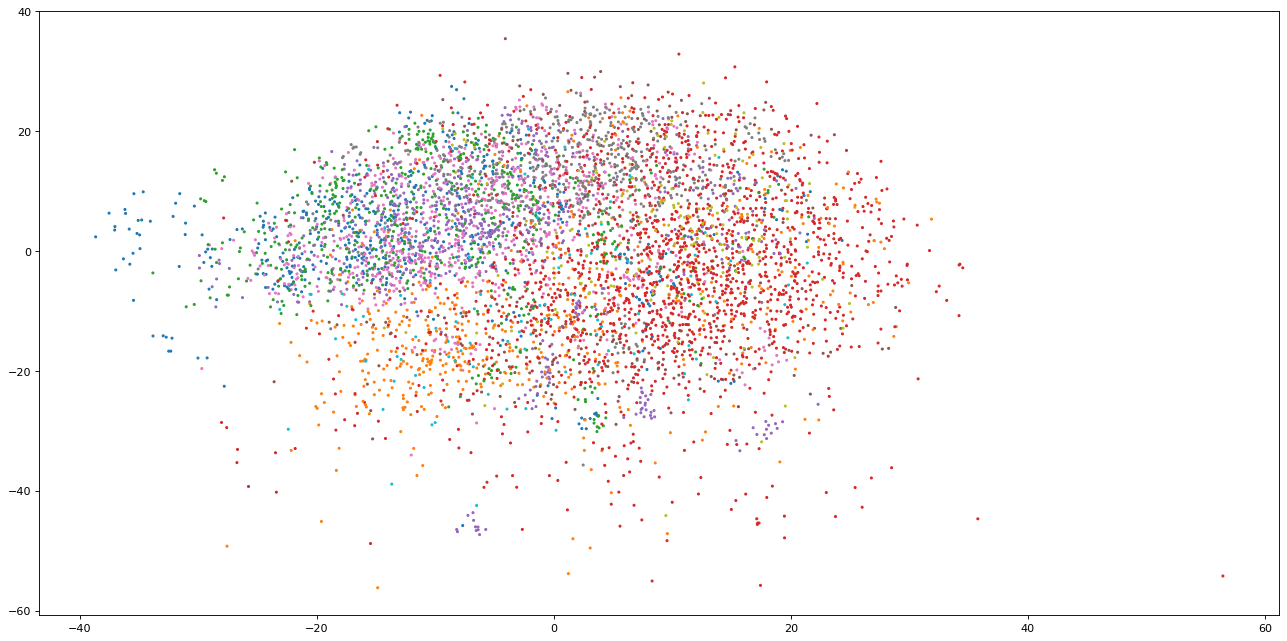

In [31]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

plt.scatter(pos[:,0], pos[:,1], s=3, c=labels.map(colors))
plt.show()

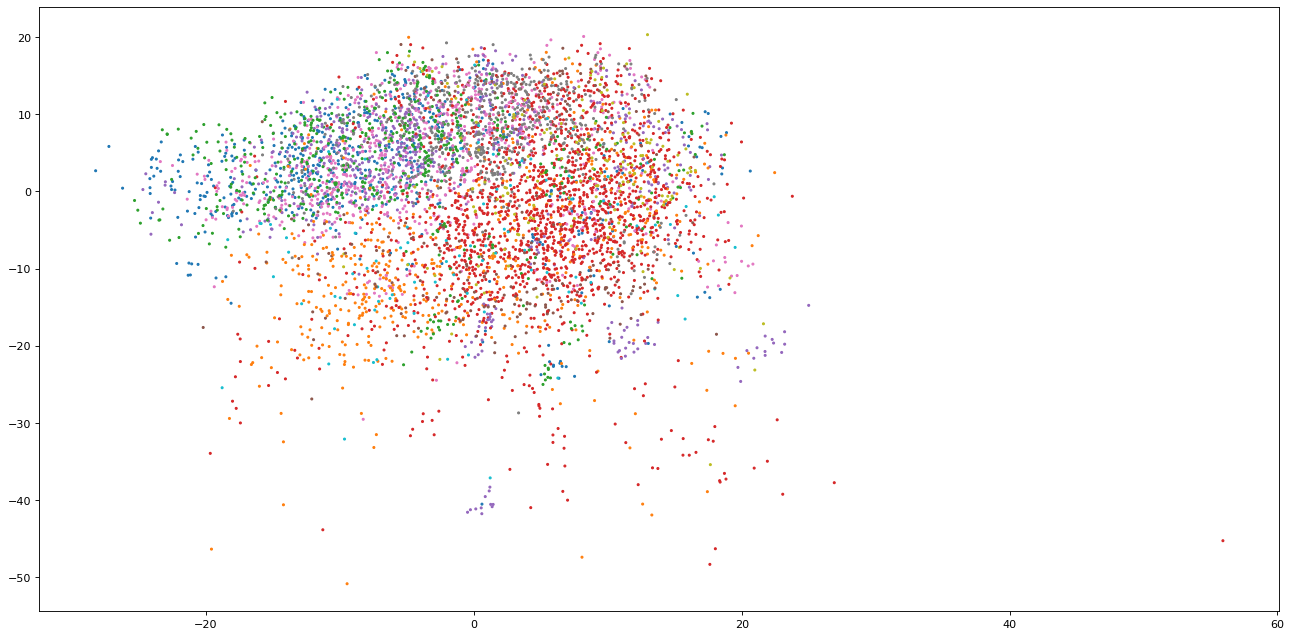

In [139]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

plt.scatter(pos[:,0], pos[:,1], s=3, c=labels.map(colors))
plt.show()

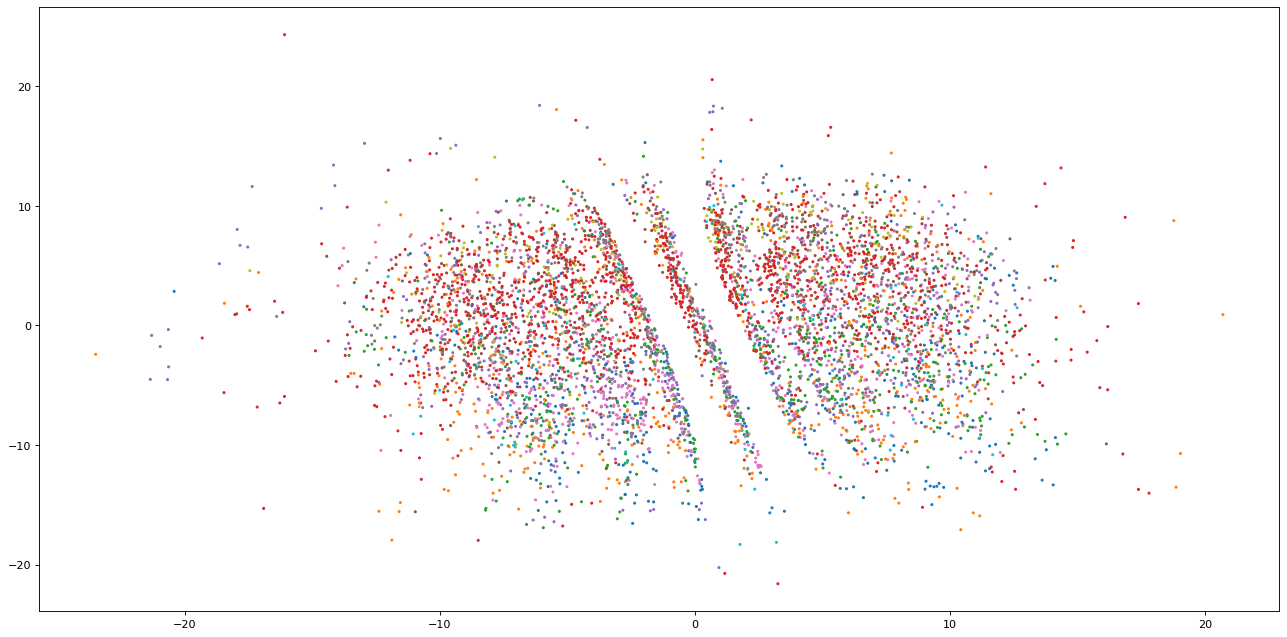

In [82]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

plt.scatter(pos[:,0], pos[:,1], s=3, c=labels.map(colors))
plt.show()

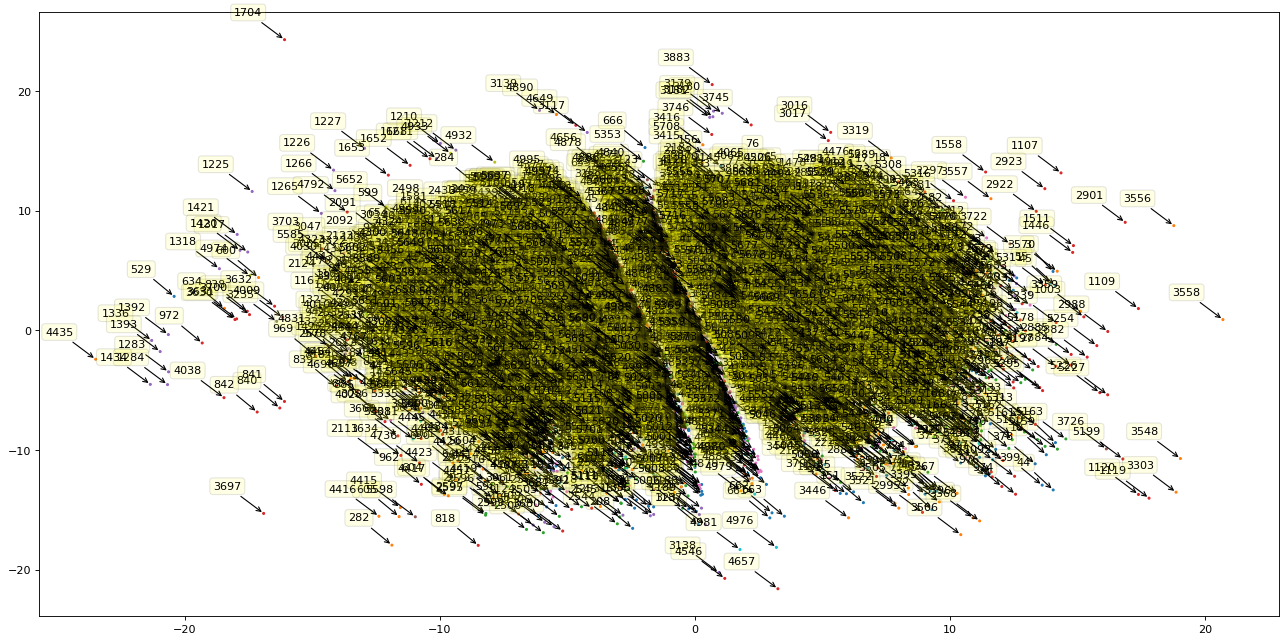

In [103]:
figure(figsize=(20, 10), dpi=80)
plt.scatter(pos[:,0], pos[:,1], s=3, c=labels.map(colors))
for label, x, y in zip(df_final.index, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [101]:
df_final[df_final['title'] == "chicken park"]

,day,day_number,month,daytime,hour,title,duration,duration_with_advertising,channel,year,genres,rating,advertising,duration_mean,duration_with_advertising_mean,number_movies
1523,Venerdì,4,marzo,mattina,10:21,chicken park,98,125,Cine34,1994,Comedy,2.5,27,99.007246,116.942029,138
1524,Giovedì,3,marzo,notte,00:55,chicken park,98,101,Cine34,1994,Comedy,2.5,3,99.007246,116.942029,138
1701,Domenica,17,luglio,notte,00:03,chicken park,98,117,Cine34,1994,Comedy,2.5,19,97.286458,119.734375,192
1702,Lunedì,25,luglio,mattina,11:21,chicken park,98,126,Cine34,1994,Comedy,2.5,28,97.286458,119.734375,192
1703,Lunedì,18,luglio,mattina,11:25,chicken park,98,112,Cine34,1994,Comedy,2.5,14,97.286458,119.734375,192
1704,Domenica,24,luglio,notte,00:27,chicken park,98,274,Cine34,1994,Comedy,2.5,176,97.286458,119.734375,192
3974,Martedì,18,ottobre,mattina,10:49,chicken park,98,127,Cine34,1994,Comedy,2.5,29,97.544218,117.190476,147
3975,Lunedì,17,ottobre,notte,00:57,chicken park,98,102,Cine34,1994,Comedy,2.5,4,97.544218,117.190476,147


In [5]:
pos = pd.read_csv("./dataset/mds_with_titles.csv")
df_merge = pd.merge(df_final, pos,left_index=True, right_index=True) 
df_merge

,day,day_number,month,daytime,hour,title,duration,duration_with_advertising,channel,year,genres,rating,advertising,duration_mean,duration_with_advertising_mean,number_movies,sharing,Unnamed: 0,0,1
0,Martedì,25,gennaio,notte,01:10,match point,124,125,Sky Cinema Due,2005,"Romance,Thriller,Drama",7.6,1,117.508197,125.819672,61,0.140,0,-17.872046,9.089185
1,Lunedì,24,gennaio,notte,01:10,the blind side,129,130,Sky Cinema Due,2009,Drama,7.6,1,117.508197,125.819672,61,0.140,1,-19.833098,9.057614
2,Sabato,29,gennaio,notte,04:10,il profeta,100,155,Sky Cinema Due,1968,Comedy,6.1,55,117.508197,125.819672,61,0.140,2,2.729298,-29.638729
3,Venerdì,7,gennaio,notte,01:45,blow,124,125,Sky Cinema Due,2001,"Crime,Drama",7.6,1,117.508197,125.819672,61,0.140,3,-18.284439,7.855896
4,Sabato,22,gennaio,notte,01:25,blow,124,125,Sky Cinema Due,2001,"Crime,Drama",7.6,1,117.508197,125.819672,61,0.140,4,-18.163189,7.507374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,Martedì,24,maggio,sera,23:00,spogliando valeria,92,110,Cielo,1989,"Romance,Thriller",4.5,18,87.166667,105.416667,12,0.905,5713,16.211511,2.302141
5714,Sabato,21,maggio,sera,21:20,la nipote,92,105,Cielo,1974,Comedy,4.8,13,87.166667,105.416667,12,0.905,5714,9.689543,4.317504
5715,Mercoledì,25,maggio,sera,23:05,la nipote,92,110,Cielo,1974,Comedy,4.8,18,87.166667,105.416667,12,0.905,5715,11.087514,0.293192
5716,Sabato,28,maggio,sera,21:20,l'attenzione,87,110,Cielo,1985,"Romance,Drama",4.1,23,87.166667,105.416667,12,0.905,5716,16.700677,-2.351548


In [6]:
df_merge.rename(columns={'0':'mds_x','1':'mds_y'},inplace= True) 

In [7]:
df_merge.to_csv("./dataset/mds_with_titles.csv")